In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import pyarrow.parquet as pq

In [3]:
def sliderPlot(df1,i):
    fig = px.line(df1, y=df1[i] )
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ))
    fig.show()

In [4]:
# df=pd.read_csv(r'C:/Users/Harsh/Downloads/DLMS Data/data.parquet')

In [5]:
table = pq.read_table(r'C:/Users/Harsh/Downloads/DLMS Data/data.parquet')

# Convert it to a Pandas DataFrame (optional)
dframe = table.to_pandas()

In [6]:
dframe

,sensor,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,Kwh
0,5f718c439c7a78.65267835,2022-11-18 00:30:00,6499.0,6514.0,6473.0,27.74,27.42,25.57,261300.0
1,5f718c439c7a78.65267835,2022-11-18 01:00:00,6520.0,6535.0,6494.0,27.29,26.84,24.40,254300.0
2,5f718c439c7a78.65267835,2022-11-18 01:30:00,6536.0,6551.0,6511.0,27.06,27.00,24.37,254800.0
3,5f718c439c7a78.65267835,2022-11-18 02:00:00,6576.0,6591.0,6550.0,25.49,25.53,23.30,242600.0
4,5f718c439c7a78.65267835,2022-11-18 02:30:00,6590.0,6605.0,6564.0,25.21,24.74,23.09,238900.0
...,...,...,...,...,...,...,...,...,...
38361,62a9920f75c931.62399458,2023-11-01 10:00:00,6021.0,6006.0,5968.0,18.01,14.66,18.98,153800.0
38362,62a9920f75c931.62399458,2023-11-01 10:30:00,6009.0,5995.0,5960.0,17.24,15.09,17.22,147700.0
38363,62a9920f75c931.62399458,2023-11-01 11:00:00,6024.0,6012.0,5976.0,17.84,14.13,17.95,149000.0
38364,62a9920f75c931.62399458,2023-11-01 11:30:00,6029.0,6016.0,5978.0,15.22,12.04,15.57,127700.0


In [7]:
id=dframe['sensor'].unique()

In [8]:
lst=[]
for location in id:
    df=dframe[dframe['sensor'] == location ]
    # df['Clock']=pd.to_datetime(df['Clock'])
    df.set_index(['Clock'],inplace=True,drop= True)
    df['2022-12-05 00:00:00':]
    filtered_df = df[((df['R_Voltage'] == 0) | (df['Y_Voltage'] == 0) | (df['B_Voltage'] == 0)) & 
                     ((df['R_Current'] == 0) | (df['Y_Current'] == 0) | (df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0
    df.loc[filtered_df.index, :] = filtered_df
    df=df[['Kwh']].resample(rule='1H').sum()
    df['id']=location

    lst.append(df)

In [9]:
df=lst[0]
df

,Kwh,id
Clock,,
2022-11-18 00:00:00,261300.0,5f718c439c7a78.65267835
2022-11-18 01:00:00,509100.0,5f718c439c7a78.65267835
2022-11-18 02:00:00,481500.0,5f718c439c7a78.65267835
2022-11-18 03:00:00,472200.0,5f718c439c7a78.65267835
2022-11-18 04:00:00,480800.0,5f718c439c7a78.65267835
...,...,...
2023-10-31 22:00:00,1066900.0,5f718c439c7a78.65267835
2023-10-31 23:00:00,975500.0,5f718c439c7a78.65267835
2023-11-01 00:00:00,887000.0,5f718c439c7a78.65267835


In [10]:
df['id']=id[0]

In [11]:
df

,Kwh,id
Clock,,
2022-11-18 00:00:00,261300.0,5f718c439c7a78.65267835
2022-11-18 01:00:00,509100.0,5f718c439c7a78.65267835
2022-11-18 02:00:00,481500.0,5f718c439c7a78.65267835
2022-11-18 03:00:00,472200.0,5f718c439c7a78.65267835
2022-11-18 04:00:00,480800.0,5f718c439c7a78.65267835
...,...,...
2023-10-31 22:00:00,1066900.0,5f718c439c7a78.65267835
2023-10-31 23:00:00,975500.0,5f718c439c7a78.65267835
2023-11-01 00:00:00,887000.0,5f718c439c7a78.65267835


In [12]:
df['kw_roll']=df['Kwh'].rolling(window=24).mean()
df.dropna(inplace=True)

In [13]:
result=adfuller(df['kw_roll'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.0325141711575876
p-value: 0.03196754281822176
Critical Values: {'1%': -3.431138396323342, '5%': -2.8618884164019005, '10%': -2.5669554572202125}


In [14]:
result=adfuller(df['Kwh'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.0948425262201584
p-value: 0.026937226462572777
Critical Values: {'1%': -3.4311382062666165, '5%': -2.8618883324211724, '10%': -2.56695541251651}


<Axes: xlabel='Clock'>

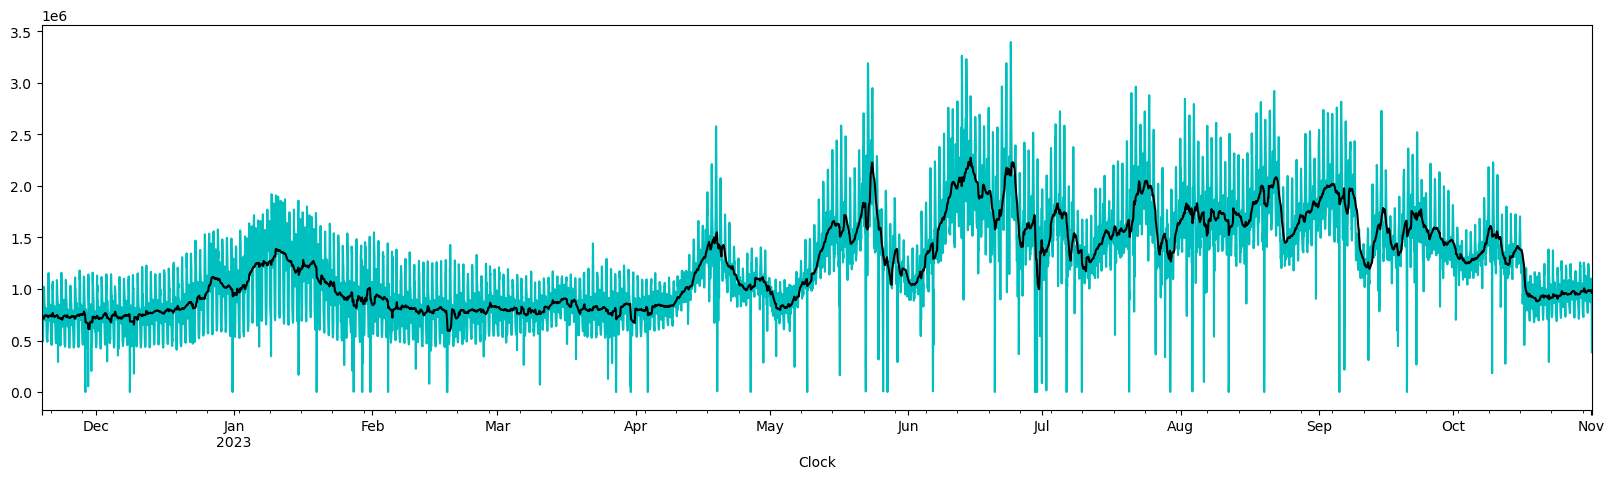

In [15]:
df['Kwh'].plot(color='c')
df['kw_roll'].plot(color='k')


In [16]:
df

,Kwh,id,kw_roll
Clock,,,
2022-11-18 23:00:00,665200.0,5f718c439c7a78.65267835,717695.833333
2022-11-19 00:00:00,592300.0,5f718c439c7a78.65267835,731487.500000
2022-11-19 01:00:00,526300.0,5f718c439c7a78.65267835,732204.166667
2022-11-19 02:00:00,505700.0,5f718c439c7a78.65267835,733212.500000
2022-11-19 03:00:00,487400.0,5f718c439c7a78.65267835,733845.833333
...,...,...,...
2023-10-31 22:00:00,1066900.0,5f718c439c7a78.65267835,985366.666667
2023-10-31 23:00:00,975500.0,5f718c439c7a78.65267835,983391.666667
2023-11-01 00:00:00,887000.0,5f718c439c7a78.65267835,981958.333333


,seasonal,trend,resid,Kwh
Clock,,,,
2022-11-18 23:00:00,294459.896616,NaN,NaN,665200.0
2022-11-19 00:00:00,200423.594834,NaN,NaN,592300.0
2022-11-19 01:00:00,67757.181058,NaN,NaN,526300.0
2022-11-19 02:00:00,-35816.662873,NaN,NaN,505700.0
2022-11-19 03:00:00,-107220.901794,NaN,NaN,487400.0
...,...,...,...,...
2023-10-31 22:00:00,265184.143967,NaN,NaN,1066900.0
2023-10-31 23:00:00,294459.896616,NaN,NaN,975500.0
2023-11-01 00:00:00,200423.594834,NaN,NaN,887000.0


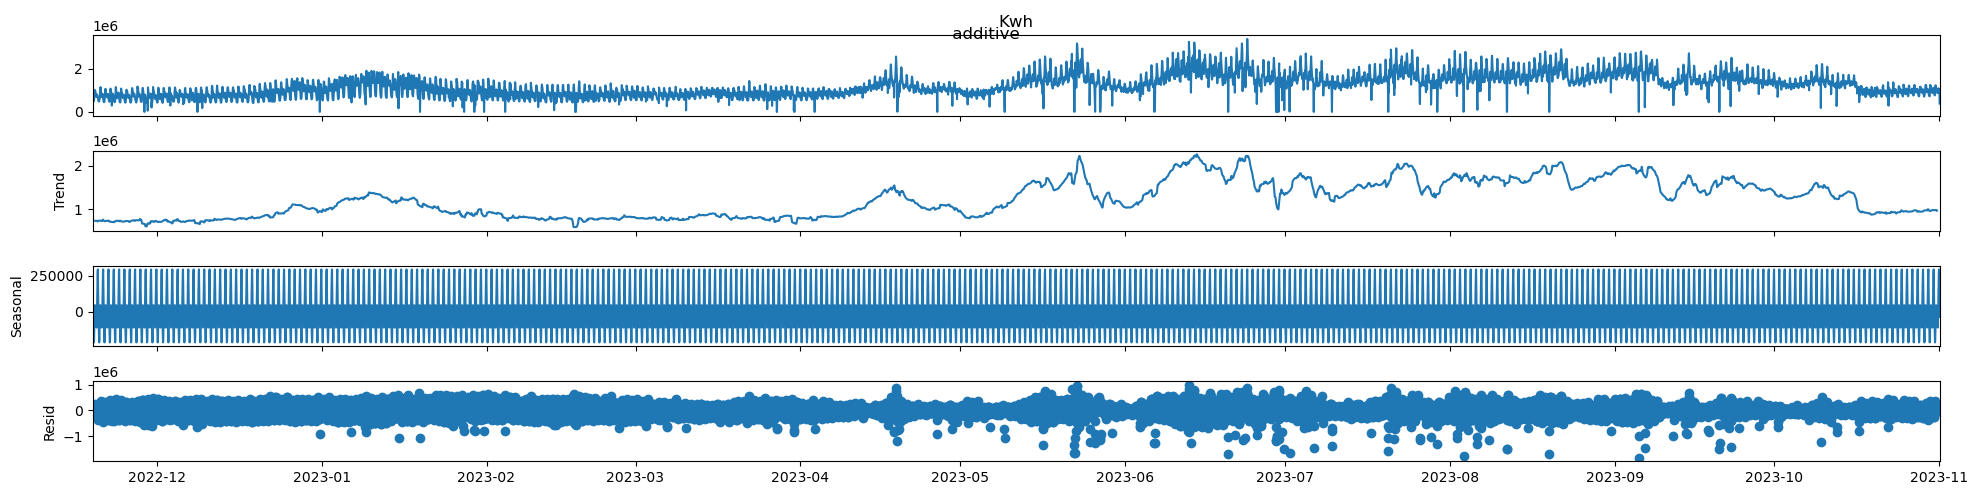

In [17]:
add_resut=seasonal_decompose(df['Kwh'],model='additive',period=24)
add_resut.plot().suptitle('\n additive',fontsize=12)
dfs=pd.concat([add_resut.seasonal,add_resut.trend,add_resut.resid,add_resut.observed],axis=1)
dfs.columns=["seasonal",'trend','resid','Kwh']
dfs

In [18]:
result=adfuller(dfs['Kwh'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.0948425262201584
p-value: 0.026937226462572777
Critical Values: {'1%': -3.4311382062666165, '5%': -2.8618883324211724, '10%': -2.56695541251651}


In [19]:
dfs['resid'].fillna(value=dfs['resid'].mean(),inplace=True)
dfs['trend'].fillna(value=dfs['trend'].mean(),inplace=True)


In [20]:
dfs['Kwh_t']=dfs['Kwh']-(dfs['resid']+dfs['seasonal'])
dfs['Kwh_n']=dfs['Kwh']-dfs['resid']


In [21]:
result=adfuller(dfs['Kwh'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.0948425262201584
p-value: 0.026937226462572777
Critical Values: {'1%': -3.4311382062666165, '5%': -2.8618883324211724, '10%': -2.56695541251651}


In [22]:
result=adfuller(dfs['trend'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.0065419381425627
p-value: 0.03428796562737953
Critical Values: {'1%': -3.431138396323342, '5%': -2.8618884164019005, '10%': -2.5669554572202125}


In [23]:
result=adfuller(dfs['Kwh_t'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.202644606579885
p-value: 0.20528701780814557
Critical Values: {'1%': -3.4311386815803457, '5%': -2.8618885424489475, '10%': -2.5669555243162}


In [24]:
result=adfuller(dfs['Kwh_n'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.8036260077385757
p-value: 0.37866297324565024
Critical Values: {'1%': -3.4311385864717447, '5%': -2.861888500423133, '10%': -2.5669555019454773}


In [25]:
dfs['rolling']=dfs['Kwh_n'].rolling(window=24).mean()

In [26]:
# dfs['rolling'].fillna(method='bfill',inplace=True)
dfs['inter']=dfs['Kwh_n'].interpolate()

In [27]:
dfs['diff']=dfs['Kwh_n']-dfs['Kwh_n'].shift(1)

In [28]:
dfs

,seasonal,trend,resid,Kwh,Kwh_t,Kwh_n,rolling,inter,diff
Clock,,,,,,,,,
2022-11-18 23:00:00,294459.896616,1.232204e+06,50.538114,665200.0,370689.565270,6.651495e+05,NaN,6.651495e+05,NaN
2022-11-19 00:00:00,200423.594834,1.232204e+06,50.538114,592300.0,391825.867052,5.922495e+05,NaN,5.922495e+05,-72900.0
2022-11-19 01:00:00,67757.181058,1.232204e+06,50.538114,526300.0,458492.280829,5.262495e+05,NaN,5.262495e+05,-66000.0
2022-11-19 02:00:00,-35816.662873,1.232204e+06,50.538114,505700.0,541466.124759,5.056495e+05,NaN,5.056495e+05,-20600.0
2022-11-19 03:00:00,-107220.901794,1.232204e+06,50.538114,487400.0,594570.363680,4.873495e+05,NaN,4.873495e+05,-18300.0
...,...,...,...,...,...,...,...,...,...
2023-10-31 22:00:00,265184.143967,1.232204e+06,50.538114,1066900.0,801665.317919,1.066849e+06,983762.008269,1.066849e+06,7600.0
2023-10-31 23:00:00,294459.896616,1.232204e+06,50.538114,975500.0,680989.565270,9.754495e+05,971107.320016,9.754495e+05,-91400.0
2023-11-01 00:00:00,200423.594834,1.232204e+06,50.538114,887000.0,686525.867052,8.869495e+05,958856.054060,8.869495e+05,-88500.0


In [29]:
dfs.dropna(inplace=True)

In [30]:
result=adfuller(dfs['inter'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.9536974191160177
p-value: 0.3072366354220337
Critical Values: {'1%': -3.431140875427615, '5%': -2.861889511847948, '10%': -2.5669560403361578}


In [31]:
result=adfuller(dfs['rolling'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.9152938214167878
p-value: 0.3249009710328886
Critical Values: {'1%': -3.431140875427615, '5%': -2.861889511847948, '10%': -2.5669560403361578}


In [32]:
result=adfuller(dfs['diff'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -14.940696585649686
p-value: 1.3239564775102878e-27
Critical Values: {'1%': -3.431140875427615, '5%': -2.861889511847948, '10%': -2.5669560403361578}


In [33]:
dfs['kw_roll']=dfs['Kwh'].rolling(window=24).mean()

<Axes: xlabel='Clock'>

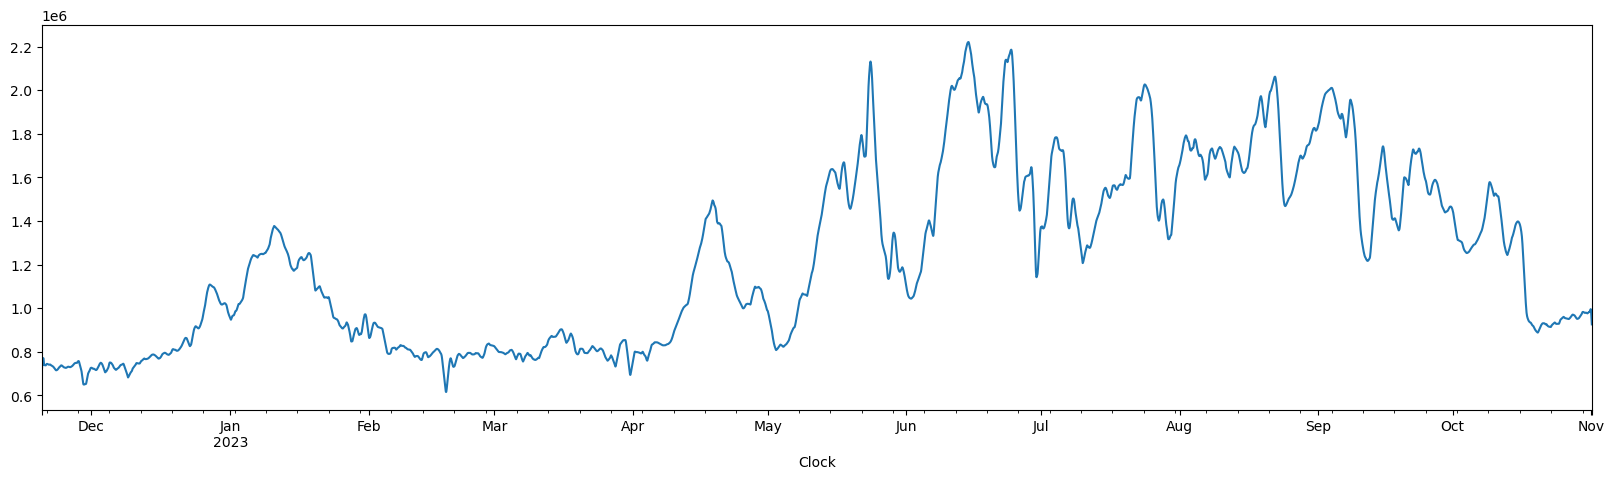

In [34]:
dfs['rolling'].plot()

<Axes: xlabel='Clock'>

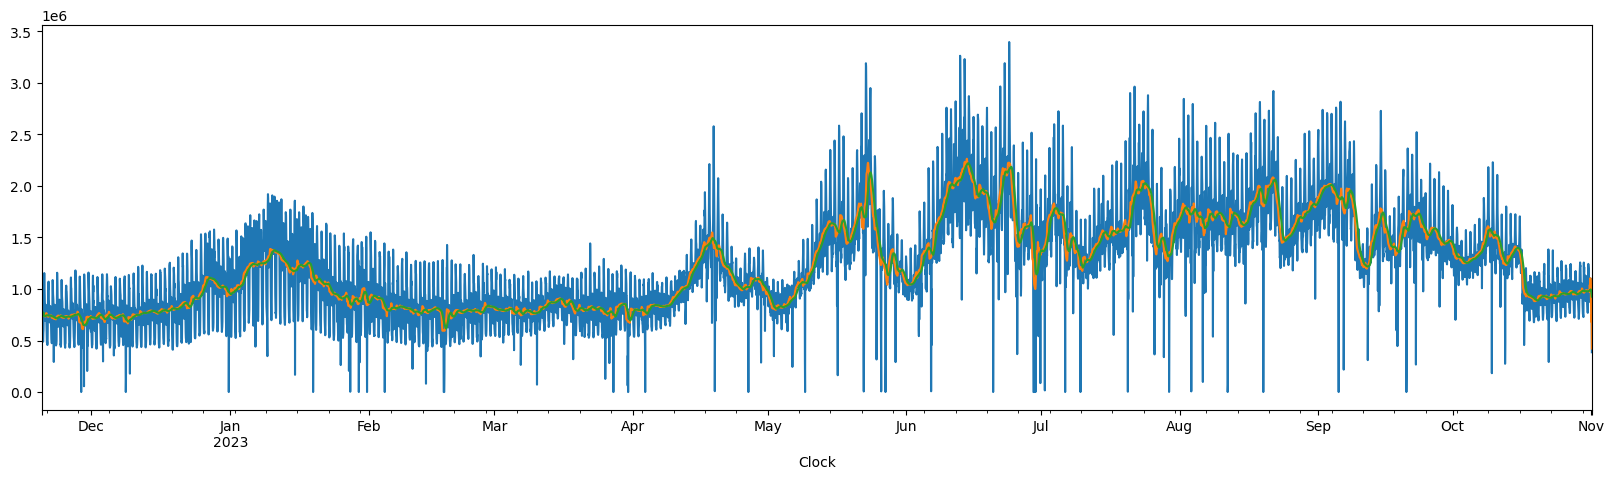

In [35]:
dfs['Kwh'].plot()
dfs['Kwh_t'].plot()
dfs['rolling'].plot()

<Axes: xlabel='Clock'>

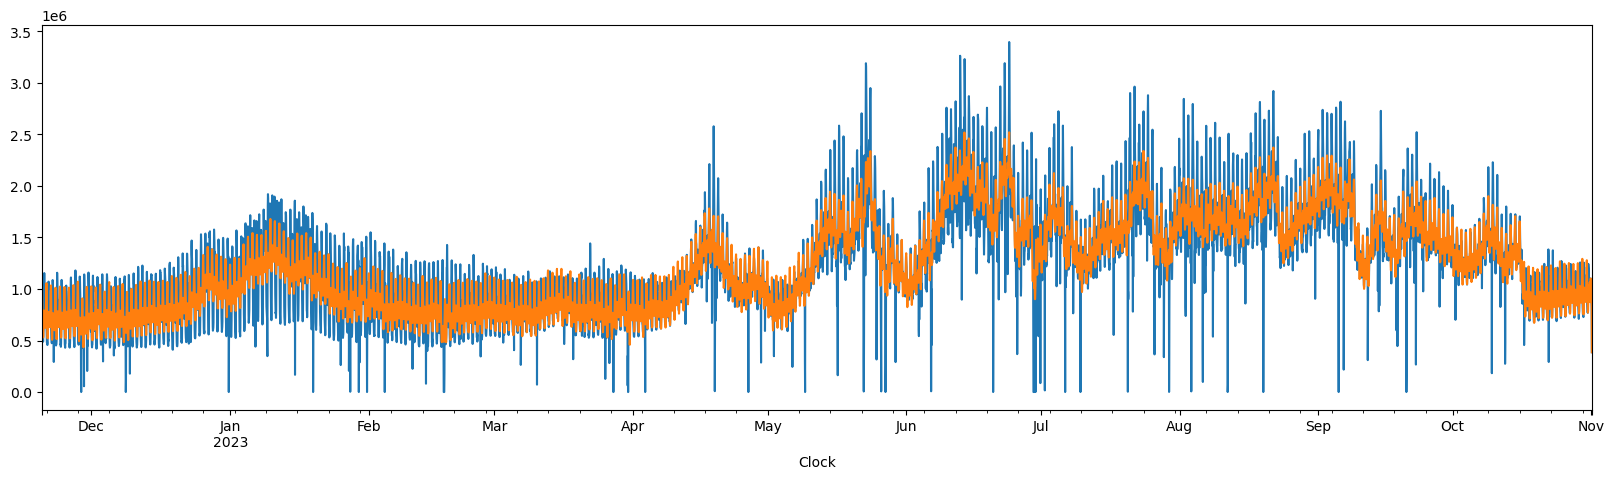

In [36]:
dfs['Kwh'].plot()
dfs['Kwh_n'].plot()

In [37]:
df=df[['Kwh']].resample(rule='1H').sum()
add_resut=seasonal_decompose(df['Kwh'],model='additive',period=24)
# add_resut.plot().suptitle('\n additive',fontsize=12)
dfs=pd.concat([add_resut.seasonal,add_resut.trend,add_resut.resid,add_resut.observed],axis=1)
dfs.columns=["seasonal",'trend','resid','Kwh']
dfs['resid'].fillna(value=dfs['resid'].mean(),inplace=True)
dfs['trend'].fillna(value=dfs['trend'].mean(),inplace=True)
dfs['Kwh_n']=dfs['Kwh']-dfs['resid']


In [38]:
dfs

,seasonal,trend,resid,Kwh,Kwh_n
Clock,,,,,
2022-11-18 23:00:00,294459.896616,1.232204e+06,50.538114,665200.0,6.651495e+05
2022-11-19 00:00:00,200423.594834,1.232204e+06,50.538114,592300.0,5.922495e+05
2022-11-19 01:00:00,67757.181058,1.232204e+06,50.538114,526300.0,5.262495e+05
2022-11-19 02:00:00,-35816.662873,1.232204e+06,50.538114,505700.0,5.056495e+05
2022-11-19 03:00:00,-107220.901794,1.232204e+06,50.538114,487400.0,4.873495e+05
...,...,...,...,...,...
2023-10-31 22:00:00,265184.143967,1.232204e+06,50.538114,1066900.0,1.066849e+06
2023-10-31 23:00:00,294459.896616,1.232204e+06,50.538114,975500.0,9.754495e+05
2023-11-01 00:00:00,200423.594834,1.232204e+06,50.538114,887000.0,8.869495e+05


In [39]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8332 entries, 2022-11-18 23:00:00 to 2023-11-01 02:00:00
Freq: H
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seasonal  8332 non-null   float64
 1   trend     8332 non-null   float64
 2   resid     8332 non-null   float64
 3   Kwh       8332 non-null   float64
 4   Kwh_n     8332 non-null   float64
dtypes: float64(5)
memory usage: 390.6 KB


In [40]:
# dfs=dfs.resample(rule='30min').sum()

<Axes: xlabel='Clock'>

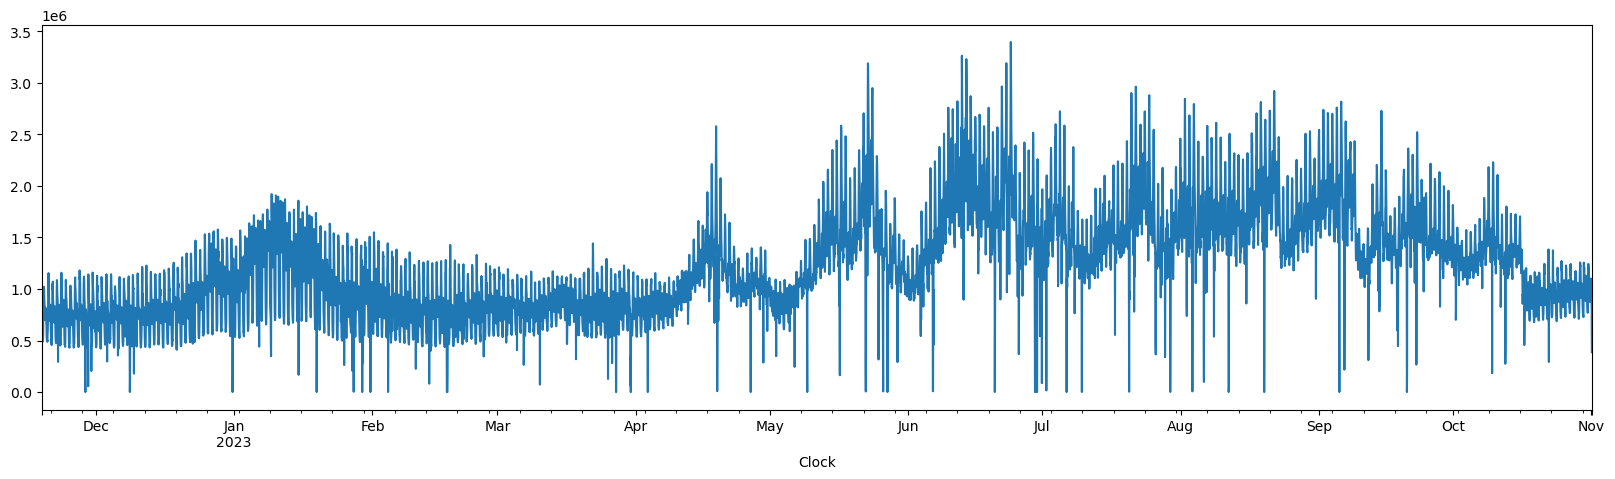

In [41]:
dfs['Kwh'].plot()

<Axes: xlabel='Clock'>

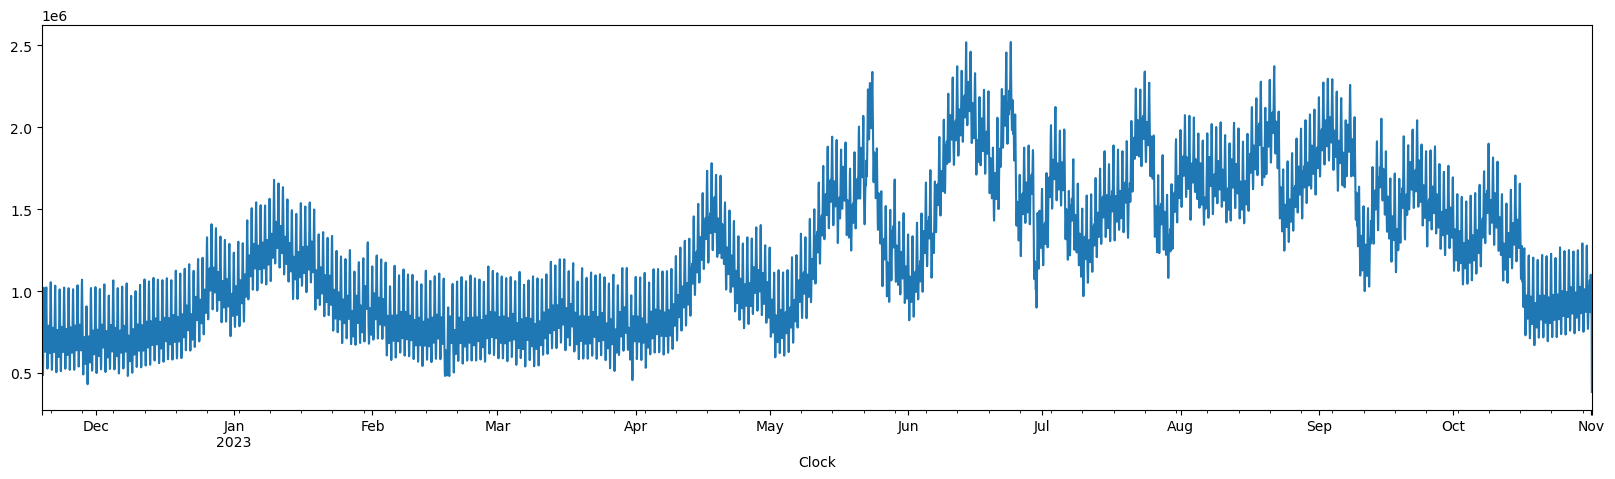

In [42]:
dfs['Kwh_n'].plot()

In [43]:
result=adfuller(dfs['Kwh_n'],autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.8036260077385757
p-value: 0.37866297324565024
Critical Values: {'1%': -3.4311385864717447, '5%': -2.861888500423133, '10%': -2.5669555019454773}


In [44]:
column_means = df_s.mean()

# Fill null values with respective column means
df_s = df_s.fillna(column_means)

NameError: name 'df_s' is not defined

In [ ]:
df_s.head()

In [ ]:
df_s.info()

In [ ]:
df_s.

In [ ]:
df_s['Kwh_n']=df_s[df_s['Kwh']-df_s['resid']]

In [ ]:
df_s.fillna()

In [ ]:
column_means = df_s.mean()

In [ ]:
df_s_filled = df_s.fillna(column_means)

In [ ]:
df_s_filled

In [ ]:
df_s_filled['Kwh_n']=df_s_filled[df_s_filled['kwh']-df_s_filled['resid']]

In [ ]:
df_s

In [ ]:
df_s = df_s.reset_index(drop=True)

# Calculate column means
column_means = df_s.mean()

# Fill null values with respective column means
df_s = df_s.fillna(column_means)

In [ ]:
df_s

In [ ]:
# df_s['Kwh_n']=df_s[df_s['kwh']-df_s['resid']]
df_s.info()

In [ ]:
df1=df1[['Kwh']].resample(rule='30Min').sum()
df1

In [ ]:
df1.isna().sum()

In [ ]:
df2=lst[1]
df2

In [ ]:
df2['2022-09-07 15:30:00':'2022-12-04 00:00:00']

In [ ]:
df2_s=df2[['Kwh']].resample(rule='30Min').max()
df2_s

In [ ]:
df2_s.isna().sum()

In [ ]:
result = df2 - df2_s 

In [ ]:
result['Kwh'].unique()

In [ ]:
sliderPlot(df2_s,'Kwh')

In [ ]:
df2_s['Kwh'].plot()

In [ ]:
indices_with_missing_values = df2_s[df2_s.isnull().any(axis=1)].index

# Display the indices
print(indices_with_missing_values)

In [ ]:
df2=df2[['Kwh']].resample(rule='30Min').mean()
df2

In [ ]:
df2.isna().sum()